In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sqlalchemy import create_engine
from scipy.stats.mstats import winsorize
from wordcloud import WordCloud
import seaborn as sns
import scipy.stats as stats
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
from scipy.stats import boxcox
import warnings
from sklearn import linear_model
import statsmodels.formula.api as smf
from scipy.stats import jarque_bera
from scipy.stats import normaltest
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

houseprice = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [4]:
import statsmodels.api as sm

In [5]:
houseprice.head(20)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,1,2008,WD,Normal,118000


In [6]:
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

In [7]:
houseprice.isnull().sum()*100/houseprice.isnull().count()

id                0.000000
mssubclass        0.000000
mszoning          0.000000
lotfrontage      17.739726
lotarea           0.000000
street            0.000000
alley            93.767123
lotshape          0.000000
landcontour       0.000000
utilities         0.000000
lotconfig         0.000000
landslope         0.000000
neighborhood      0.000000
condition1        0.000000
condition2        0.000000
bldgtype          0.000000
housestyle        0.000000
overallqual       0.000000
overallcond       0.000000
yearbuilt         0.000000
yearremodadd      0.000000
roofstyle         0.000000
roofmatl          0.000000
exterior1st       0.000000
exterior2nd       0.000000
masvnrtype        0.547945
masvnrarea        0.547945
exterqual         0.000000
extercond         0.000000
foundation        0.000000
                   ...    
bedroomabvgr      0.000000
kitchenabvgr      0.000000
kitchenqual       0.000000
totrmsabvgrd      0.000000
functional        0.000000
fireplaces        0.000000
f

In [8]:
# drop the columns with high percentage of missing values
houseprice = houseprice.drop(['alley','fireplacequ','poolqc','fence','miscfeature'], axis=1)

In [9]:
houseprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-null object
exterior2nd      1460 non

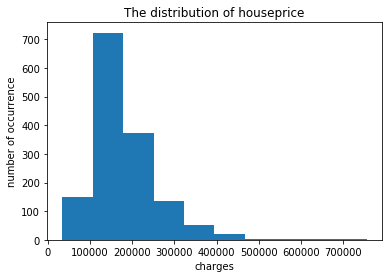

In [10]:
plt.hist(houseprice['saleprice'])
plt.title("The distribution of houseprice")
plt.xlabel("charges")
plt.ylabel("number of occurrence")
plt.show()

In [11]:
cat_hp=houseprice.select_dtypes(include='object')
print(cat_hp)

     mszoning street lotshape landcontour utilities lotconfig landslope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
5          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
6          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
7          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
8          RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
9          RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
10         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
11         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
12         RL   Pave     

In [12]:
cat_hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
mszoning         1460 non-null object
street           1460 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-null object
exterior2nd      1460 non-null object
masvnrtype       1452 non-null object
exterqual        1460 non-null object
extercond        1460 non-null object
foundation       1460 non-null object
bsmtqual         1423 non-null object
bsmtcond         1423 non-null object
bsmtexposure     1422 non-null object
bsmtfintype1     14

In [13]:
# Question??? numerical variables can be categorical not continious, what to do???
num_df = houseprice.select_dtypes(include=[np.number])


#con_hp1=houseprice.select_dtypes(include='int64')
#con_hp2=houseprice.select_dtypes(include='float64')
#con_hp=pd.concat([con_hp1, con_hp2])

In [14]:
print(num_df.head(10))

   id  mssubclass  lotfrontage  lotarea  overallqual  overallcond  yearbuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   
5   6          50         85.0    14115            5            5       1993   
6   7          20         75.0    10084            8            5       2004   
7   8          60          NaN    10382            7            6       1973   
8   9          50         51.0     6120            7            5       1931   
9  10         190         50.0     7420            5            6       1939   

   yearremodadd  masvnrarea  bsmtfinsf1  ...  wooddecksf  openporchsf  \
0          2003       196.0         706  ...  

In [15]:
num_df=num_df.drop(columns=['saleprice'])

In [16]:
# check numerical variables missing values

num_df.isnull().sum()*100/num_df.isnull().count()

id                0.000000
mssubclass        0.000000
lotfrontage      17.739726
lotarea           0.000000
overallqual       0.000000
overallcond       0.000000
yearbuilt         0.000000
yearremodadd      0.000000
masvnrarea        0.547945
bsmtfinsf1        0.000000
bsmtfinsf2        0.000000
bsmtunfsf         0.000000
totalbsmtsf       0.000000
firstflrsf        0.000000
secondflrsf       0.000000
lowqualfinsf      0.000000
grlivarea         0.000000
bsmtfullbath      0.000000
bsmthalfbath      0.000000
fullbath          0.000000
halfbath          0.000000
bedroomabvgr      0.000000
kitchenabvgr      0.000000
totrmsabvgrd      0.000000
fireplaces        0.000000
garageyrblt       5.547945
garagecars        0.000000
garagearea        0.000000
wooddecksf        0.000000
openporchsf       0.000000
enclosedporch     0.000000
threessnporch     0.000000
screenporch       0.000000
poolarea          0.000000
miscval           0.000000
mosold            0.000000
yrsold            0.000000
d

In [17]:
# fill-in missing values for numeric variables
num_df['lotfrontage'] = num_df['lotfrontage'].fillna(num_df['lotfrontage'].value_counts().idxmax())
num_df['masvnrarea'] = num_df['lotfrontage'].fillna(num_df['lotfrontage'].value_counts().idxmax())
num_df['garageyrblt'] = num_df['garageyrblt'].fillna(num_df['garageyrblt'].value_counts().idxmax())

In [18]:
num_df.isnull().sum()*100/num_df.isnull().count()

id               0.0
mssubclass       0.0
lotfrontage      0.0
lotarea          0.0
overallqual      0.0
overallcond      0.0
yearbuilt        0.0
yearremodadd     0.0
masvnrarea       0.0
bsmtfinsf1       0.0
bsmtfinsf2       0.0
bsmtunfsf        0.0
totalbsmtsf      0.0
firstflrsf       0.0
secondflrsf      0.0
lowqualfinsf     0.0
grlivarea        0.0
bsmtfullbath     0.0
bsmthalfbath     0.0
fullbath         0.0
halfbath         0.0
bedroomabvgr     0.0
kitchenabvgr     0.0
totrmsabvgrd     0.0
fireplaces       0.0
garageyrblt      0.0
garagecars       0.0
garagearea       0.0
wooddecksf       0.0
openporchsf      0.0
enclosedporch    0.0
threessnporch    0.0
screenporch      0.0
poolarea         0.0
miscval          0.0
mosold           0.0
yrsold           0.0
dtype: float64

In [19]:
column_list=list(cat_hp.columns) 
print(column_list)

['mszoning', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual', 'functional', 'garagetype', 'garagefinish', 'garagequal', 'garagecond', 'paveddrive', 'saletype', 'salecondition']


In [20]:
num_column_list=list(num_df.columns) 
print(num_column_list)

['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch', 'poolarea', 'miscval', 'mosold', 'yrsold']


In [21]:
cat_hp.isnull().sum()*100/cat_hp.isnull().count()

mszoning         0.000000
street           0.000000
lotshape         0.000000
landcontour      0.000000
utilities        0.000000
lotconfig        0.000000
landslope        0.000000
neighborhood     0.000000
condition1       0.000000
condition2       0.000000
bldgtype         0.000000
housestyle       0.000000
roofstyle        0.000000
roofmatl         0.000000
exterior1st      0.000000
exterior2nd      0.000000
masvnrtype       0.547945
exterqual        0.000000
extercond        0.000000
foundation       0.000000
bsmtqual         2.534247
bsmtcond         2.534247
bsmtexposure     2.602740
bsmtfintype1     2.534247
bsmtfintype2     2.602740
heating          0.000000
heatingqc        0.000000
centralair       0.000000
electrical       0.068493
kitchenqual      0.000000
functional       0.000000
garagetype       5.547945
garagefinish     5.547945
garagequal       5.547945
garagecond       5.547945
paveddrive       0.000000
saletype         0.000000
salecondition    0.000000
dtype: float

In [22]:
print(len(cat_hp))

1460


In [23]:
houseprice["saleprice"].isnull().sum()*100/houseprice["saleprice"].isnull().count()

0.0

In [24]:
# append the target variable to cat_hp
#cat_hp_all=pd.concat([cat_hp, houseprice['saleprice']])

cat_hp_all=cat_hp.join(houseprice['saleprice'])
print(cat_hp_all)

     mszoning street lotshape landcontour utilities lotconfig landslope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
5          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
6          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
7          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
8          RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
9          RL   Pave      Reg         Lvl    AllPub    Corner       Gtl   
10         RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
11         RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
12         RL   Pave     

In [25]:
column_list=list(cat_hp_all.columns) 
print(column_list)

['mszoning', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual', 'functional', 'garagetype', 'garagefinish', 'garagequal', 'garagecond', 'paveddrive', 'saletype', 'salecondition', 'saleprice']


In [26]:
cat_hp_all.isnull().sum()*100/cat_hp_all.isnull().count()

mszoning         0.000000
street           0.000000
lotshape         0.000000
landcontour      0.000000
utilities        0.000000
lotconfig        0.000000
landslope        0.000000
neighborhood     0.000000
condition1       0.000000
condition2       0.000000
bldgtype         0.000000
housestyle       0.000000
roofstyle        0.000000
roofmatl         0.000000
exterior1st      0.000000
exterior2nd      0.000000
masvnrtype       0.547945
exterqual        0.000000
extercond        0.000000
foundation       0.000000
bsmtqual         2.534247
bsmtcond         2.534247
bsmtexposure     2.602740
bsmtfintype1     2.534247
bsmtfintype2     2.602740
heating          0.000000
heatingqc        0.000000
centralair       0.000000
electrical       0.068493
kitchenqual      0.000000
functional       0.000000
garagetype       5.547945
garagefinish     5.547945
garagequal       5.547945
garagecond       5.547945
paveddrive       0.000000
saletype         0.000000
salecondition    0.000000
saleprice   

In [27]:
print(len(column_list))

39


In [28]:
print(column_list)

['mszoning', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual', 'functional', 'garagetype', 'garagefinish', 'garagequal', 'garagecond', 'paveddrive', 'saletype', 'salecondition', 'saleprice']


In [29]:
# fill-in missing value for categorical variables

for column in column_list:
    for i in range(0, len(cat_hp_all)):
        if pd.isnull(cat_hp_all[column][i]):
            cat_hp_all[column][i] = cat_hp_all.fillna(cat_hp_all[column].value_counts().index[0],inplace=True)
            

                
        
#for i in range(0, len(cat_hp_all)):
   # for column in column_list:   
        #if pd.isnull(cat_hp_all[column][i]):
            #cat_hp_all[column][i] = cat_hp_all[column][i-1]
        


In [30]:
#print(cat_hp_all[column].value_counts())

In [31]:
cat_hp_all.isnull().sum()*100/cat_hp_all.isnull().count()

mszoning         0.000000
street           0.000000
lotshape         0.000000
landcontour      0.000000
utilities        0.000000
lotconfig        0.000000
landslope        0.000000
neighborhood     0.000000
condition1       0.000000
condition2       0.000000
bldgtype         0.000000
housestyle       0.000000
roofstyle        0.000000
roofmatl         0.000000
exterior1st      0.000000
exterior2nd      0.000000
masvnrtype       0.068493
exterqual        0.000000
extercond        0.000000
foundation       0.000000
bsmtqual         0.000000
bsmtcond         0.000000
bsmtexposure     0.000000
bsmtfintype1     0.000000
bsmtfintype2     0.000000
heating          0.000000
heatingqc        0.000000
centralair       0.000000
electrical       0.000000
kitchenqual      0.000000
functional       0.000000
garagetype       0.000000
garagefinish     0.000000
garagequal       0.000000
garagecond       0.000000
paveddrive       0.000000
saletype         0.000000
salecondition    0.000000
saleprice   

In [32]:
cat_hp_all['masvnrtype'].value_counts(dropna=False)

None       871
BrkFace    445
Stone      128
BrkCmn      15
NaN          1
Name: masvnrtype, dtype: int64

In [33]:
#print(cat_hp_all['masvnrtype'])

In [34]:
pip install sklearn-pandas

Note: you may need to restart the kernel to use updated packages.


In [35]:
from sklearn_pandas import DataFrameMapper, cross_val_score
import sklearn.preprocessing, sklearn.decomposition, sklearn.linear_model, sklearn.pipeline, sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
list(cat_hp_all.columns.values)

['mszoning',
 'street',
 'lotshape',
 'landcontour',
 'utilities',
 'lotconfig',
 'landslope',
 'neighborhood',
 'condition1',
 'condition2',
 'bldgtype',
 'housestyle',
 'roofstyle',
 'roofmatl',
 'exterior1st',
 'exterior2nd',
 'masvnrtype',
 'exterqual',
 'extercond',
 'foundation',
 'bsmtqual',
 'bsmtcond',
 'bsmtexposure',
 'bsmtfintype1',
 'bsmtfintype2',
 'heating',
 'heatingqc',
 'centralair',
 'electrical',
 'kitchenqual',
 'functional',
 'garagetype',
 'garagefinish',
 'garagequal',
 'garagecond',
 'paveddrive',
 'saletype',
 'salecondition',
 'saleprice']

In [37]:
# t_test or anova on the visual

In [38]:
import statsmodels.api as sm

In [39]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [40]:
len(column_list)

39

In [41]:
# convert variables into binary

#convert_list=convert_list.values.tolist()
#le = preprocessing.LabelEncoder()
#le.fit(convert_list)
new_column_list=column_list[0:37]

for col in new_column_list:
    cat_hp_all[col]=pd.get_dummies(cat_hp_all[col],drop_first=True)
    print(cat_hp_all.head(20))

    mszoning street lotshape landcontour utilities lotconfig landslope  \
0          0   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          0   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          0   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          0   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          0   Pave      IR1         Lvl    AllPub       FR2       Gtl   
5          0   Pave      IR1         Lvl    AllPub    Inside       Gtl   
6          0   Pave      Reg         Lvl    AllPub    Inside       Gtl   
7          0   Pave      IR1         Lvl    AllPub    Corner       Gtl   
8          0   Pave      Reg         Lvl    AllPub    Inside       Gtl   
9          0   Pave      Reg         Lvl    AllPub    Corner       Gtl   
10         0   Pave      Reg         Lvl    AllPub    Inside       Gtl   
11         0   Pave      IR1         Lvl    AllPub    Inside       Gtl   
12         0   Pave      IR2         L

    mszoning  street  lotshape  landcontour  utilities  lotconfig landslope  \
0          0       1         0            0          0          0       Gtl   
1          0       1         0            0          0          0       Gtl   
2          0       1         0            0          0          0       Gtl   
3          0       1         0            0          0          0       Gtl   
4          0       1         0            0          0          0       Gtl   
5          0       1         0            0          0          0       Gtl   
6          0       1         0            0          0          0       Gtl   
7          0       1         0            0          0          0       Gtl   
8          0       1         0            0          0          0       Gtl   
9          0       1         0            0          0          0       Gtl   
10         0       1         0            0          0          0       Gtl   
11         0       1         0            0         

    mszoning  street  lotshape  landcontour  utilities  lotconfig  landslope  \
0          0       1         0            0          0          0          0   
1          0       1         0            0          0          0          0   
2          0       1         0            0          0          0          0   
3          0       1         0            0          0          0          0   
4          0       1         0            0          0          0          0   
5          0       1         0            0          0          0          0   
6          0       1         0            0          0          0          0   
7          0       1         0            0          0          0          0   
8          0       1         0            0          0          0          0   
9          0       1         0            0          0          0          0   
10         0       1         0            0          0          0          0   
11         0       1         0          

    mszoning  street  lotshape  landcontour  utilities  lotconfig  landslope  \
0          0       1         0            0          0          0          0   
1          0       1         0            0          0          0          0   
2          0       1         0            0          0          0          0   
3          0       1         0            0          0          0          0   
4          0       1         0            0          0          0          0   
5          0       1         0            0          0          0          0   
6          0       1         0            0          0          0          0   
7          0       1         0            0          0          0          0   
8          0       1         0            0          0          0          0   
9          0       1         0            0          0          0          0   
10         0       1         0            0          0          0          0   
11         0       1         0          

In [56]:
# linear model OLS

# Y is the target variable
Y = cat_hp_all['saleprice']
X=np.concatenate((cat_hp_all.iloc[:,0:37],num_df),axis=1) 


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in the training set is {}".format(X_train.shape[0]))
print("The number of observations in the test set is {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

print(results.summary())


<class 'numpy.ndarray'>
The number of observations in the training set is 1168
The number of observations in the test set is 292
                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     78.34
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        21:41:05   Log-Likelihood:                -13779.
No. Observations:                1168   AIC:                         2.770e+04
Df Residuals:                    1097   BIC:                         2.806e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--

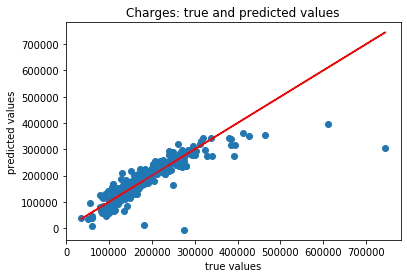

Mean absolute error of the prediction is: 23353.457587078025
Mean squared error of the prediction is: 1917904835.1876447
Root mean squared error of the prediction is: 43793.89038653274
Mean absolute percentage error of the prediction is: 13.301067581066317


In [43]:
# predict

X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)


plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [44]:
all_list=column_list[0:37]+num_column_list
print(all_list)
print(len(all_list))
pvalue_set=list(results.pvalues.iloc[0:74])

#for var in all_list:
    #pvalue_set.append(results.pvalues.loc[var])

['mszoning', 'street', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2', 'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual', 'functional', 'garagetype', 'garagefinish', 'garagequal', 'garagecond', 'paveddrive', 'saletype', 'id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd', 'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf', 'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch', 'poolarea', 'miscval', 

In [45]:
len(pvalue_set)

74

In [46]:
len(all_list)

74

In [47]:
pvalue_df = pd.DataFrame(
    {'varname': all_list,
     'pvalue': pvalue_set
    })

In [48]:
pvalue_df.head(10)

,varname,pvalue
0,mszoning,0.778390
1,street,0.096319
2,lotshape,0.053050
3,landcontour,0.137821
4,utilities,0.171240
5,lotconfig,0.131508
6,landslope,0.035294
7,neighborhood,0.487031
8,condition1,0.643915
9,condition2,0.010690


In [49]:
indexNames = pvalue_df[ pvalue_df['pvalue'] >0.05 ].index
pvalue_df.drop(indexNames , inplace=True)
print(pvalue_df)

         varname        pvalue
6      landslope  3.529365e-02
9     condition2  1.068955e-02
11    housestyle  1.659580e-02
13      roofmatl  9.552515e-03
14   exterior1st  6.205891e-03
23  bsmtfintype1  2.979279e-07
33    garagequal  4.116227e-05
39   lotfrontage  1.442514e-08
41   overallqual  2.342045e-02
42   overallcond  1.327717e-33
43     yearbuilt  9.813010e-07
44  yearremodadd  3.190745e-09
47    bsmtfinsf2  1.137612e-02
50    firstflrsf  1.299544e-02
52  lowqualfinsf  1.649772e-02
54  bsmtfullbath  3.964019e-07
55  bsmthalfbath  2.533407e-04
59  kitchenabvgr  3.070712e-05
60  totrmsabvgrd  1.118574e-02
61    fireplaces  2.272114e-05
62   garageyrblt  4.979458e-03
64    garagearea  9.170790e-04
65    wooddecksf  1.223585e-02
66   openporchsf  1.085378e-02
70      poolarea  5.128306e-04
71       miscval  4.789432e-11


In [50]:
# Question
# Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which 
# features have a more prominent effect on house prices?

In [51]:
new_df = houseprice.filter(list(pvalue_df.varname), axis=1)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 26 columns):
landslope       1460 non-null object
condition2      1460 non-null object
housestyle      1460 non-null object
roofmatl        1460 non-null object
exterior1st     1460 non-null object
bsmtfintype1    1423 non-null object
garagequal      1379 non-null object
lotfrontage     1201 non-null float64
overallqual     1460 non-null int64
overallcond     1460 non-null int64
yearbuilt       1460 non-null int64
yearremodadd    1460 non-null int64
bsmtfinsf2      1460 non-null int64
firstflrsf      1460 non-null int64
lowqualfinsf    1460 non-null int64
bsmtfullbath    1460 non-null int64
bsmthalfbath    1460 non-null int64
kitchenabvgr    1460 non-null int64
totrmsabvgrd    1460 non-null int64
fireplaces      1460 non-null int64
garageyrblt     1379 non-null float64
garagearea      1460 non-null int64
wooddecksf      1460 non-null int64
openporchsf     1460 non-null int64
poolarea        14

In [52]:
#new_df = cat_hp_all.filter(['lotshape','lotconfig','condition1','roofstyle','masvnrtype','extercond','foundation','bsmtqual',
                            #'bsmtexposure','bsmtfintype1','centralair','functional','garagetype','garagefinish'], axis=1)

In [83]:
# filter numeric variables
p1=list(new_df.columns.values)
p1.remove('landslope')
p1.remove('housestyle')
p1.remove('condition2')
p1.remove('roofmatl')
p1.remove('exterior1st')
p1.remove('bsmtfintype1')
p1.remove('garagequal')# end up with p1 only include numeric varibales for creating new_df


new_df_num = num_df.filter(p1, axis=1)
new_df_num

# filter categorical variables
p2=['landslope','housestyle','condition2','roofmatl','exterior1st','bsmtfintype1','garagequal']
new_df_cat=cat_hp_all.filter(p2, axis=1)

In [85]:

Y = new_df['saleprice']
X=np.concatenate((new_df_num,new_df_cat),axis=1) 


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in the training set is {}".format(X_train.shape[0]))
print("The number of observations in the test set is {}".format(X_test.shape[0]))

X_train = sm.add_constant(X_train)

results = sm.OLS(y_train, X_train).fit()

print(results.summary())

The number of observations in the training set is 1168
The number of observations in the test set is 292
                            OLS Regression Results                            
Dep. Variable:              saleprice   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     169.7
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        22:21:13   Log-Likelihood:                -13920.
No. Observations:                1168   AIC:                         2.789e+04
Df Residuals:                    1142   BIC:                         2.802e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------

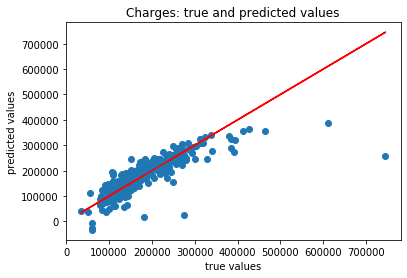

Mean absolute error of the prediction is: 27410.06525584242
Mean squared error of the prediction is: 2319352283.405859
Root mean squared error of the prediction is: 48159.65410388512
Mean absolute percentage error of the prediction is: 16.406517156336488


In [86]:
# predict

X_test = sm.add_constant(X_test)

# We are making predictions here
y_preds = results.predict(X_test)


plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

In [ ]:
# comparing the two models, one with original all categorical variables(74 vairables), and one with selected variables(26 variables)
# from the adjust R-squared to see, frist model is better, first model adjust R-squared =0.823, and second model adjust R-squared is 0.783, 
# so first model is better on adjust R-squared, and about stats BIC, second model is better than fist mode, because first model BIC= 2.806e+04
# second model BIC=2.802e+04

# regarding the four metrics of MASE,MSE,RMSE,MAPE, original model is better,because first model has smaller metrics values
# than second model

In [ ]:
# metrics of first model
#Mean absolute error of the prediction is: 23353.457587078025
#Mean squared error of the prediction is: 1917904835.1876447
#Root mean squared error of the prediction is: 43793.89038653274
#Mean absolute percentage error of the prediction is: 13.301067581066317

In [ ]:
# Do the results sound reasonable to you? If not, try to explain the potential reasons????

In [ ]:
# will now add continious variables to models. But how to deal with 50% missing values?

In [ ]:
# add some interaction varibales
# but needs to check correlation matrix first